<a href="https://colab.research.google.com/github/anchhabra1305n/Data-Science-Practice-Problems/blob/master/Healthcare_II_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

project_path =  '/content/drive/My Drive/Healthcare_Analytics_Jantahack_AV/'
project_path

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


'/content/drive/My Drive/Healthcare_Analytics_Jantahack_AV/'

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Iris Dataset
from sklearn.datasets import load_iris

#Plotting Decision Tree
# !pip install graphviz
import graphviz



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install sweetviz
import sweetviz

     |████████████████████████████████| 327kB 4.4MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
pd.options.display.max_columns = None

In [ ]:
train_main = pd.read_csv(project_path+'train.csv')
test_main = pd.read_csv(project_path+'test.csv')
train_main.columns
test_main.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [ ]:
train_main.head(3)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40


In [ ]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [ ]:
missing_train1 = train_main.isnull().sum()
missing_train2 = train_main.isnull().sum()/len(train_main)
missing_train3 = pd.concat([missing_train1, missing_train2],axis = 1)
missing_train3 = missing_train3.rename(columns={0:'Missing_values',1: 'Missing_Values_Dis'})
missing_train3

missing_test1 = train_main.isnull().sum()
missing_test2 = train_main.isnull().sum()/len(train_main)
missing_test3 = pd.concat([missing_test1, missing_test2],axis = 1)
missing_test3 = missing_test3.rename(columns={0:'Missing_values',1: 'Missing_Values_Dis'})
missing_test3

,Missing_values,Missing_Values_Dis
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.000355


,Missing_values,Missing_Values_Dis
case_id,0,0.000000
Hospital_code,0,0.000000
Hospital_type_code,0,0.000000
City_Code_Hospital,0,0.000000
Hospital_region_code,0,0.000000
Available Extra Rooms in Hospital,0,0.000000
Department,0,0.000000
Ward_Type,0,0.000000
Ward_Facility_Code,0,0.000000
Bed Grade,113,0.000355


In [ ]:
train_main['Bed Grade'] = train_main['Bed Grade'].astype(float)
train_main['City_Code_Patient'] = train_main['City_Code_Patient'].astype(float)

In [ ]:
train_main.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [ ]:
train_main.columns[train_main.isnull().any()]

Index(['Bed Grade', 'City_Code_Patient'], dtype='object')

In [ ]:
train_main['Hospital_code'] = train_main['Hospital_code'].astype(str)
# train_main['Bed Grade'] = train_main['Bed Grade'].astype(str)
# train_main['City_Code_Patient'] = train_main['City_Code_Patient'].astype(str)
train_main['Available Extra Rooms in Hospital'] = train_main['Available Extra Rooms in Hospital'].astype(str)
train_main['City_Code_Hospital'] = train_main['City_Code_Hospital'].astype(str)

test_main['Hospital_code'] = test_main['Hospital_code'].astype(str)
test_main['Bed Grade'] = test_main['Bed Grade'].astype(str)
# test_main['City_Code_Patient'] = test_main['City_Code_Patient'].astype(str)
test_main['Available Extra Rooms in Hospital'] = test_main['Available Extra Rooms in Hospital'].astype(str)
test_main['City_Code_Hospital'] = test_main['City_Code_Hospital'].astype(str)

### Missing Value Imputation 
-- KNN Imputer

In [ ]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


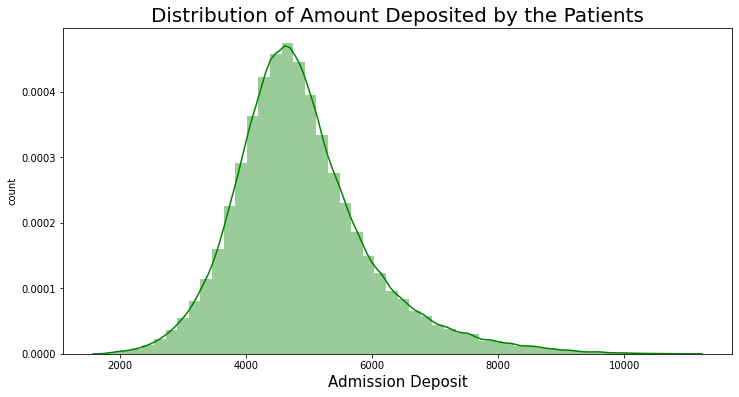

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.distplot(train_main['Admission_Deposit'], color = 'green')
plt.title('Distribution of Amount Deposited by the Patients', fontsize = 20)
plt.xlabel('Admission Deposit', fontsize = 15)
plt.ylabel('count')
plt.show();

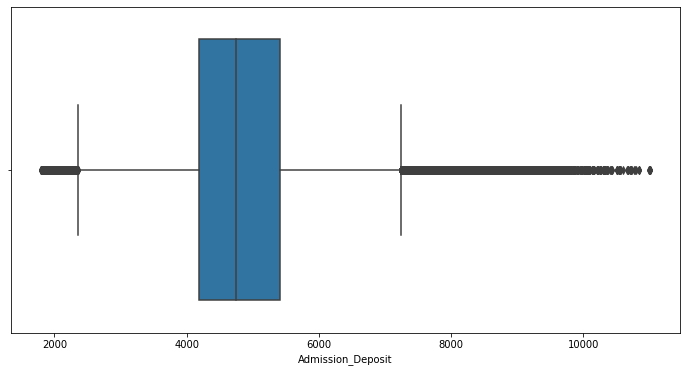

In [ ]:
sns.boxplot(x =  train_main['Admission_Deposit'])
# sns.boxplot(x=test_data['LoanAmount'])

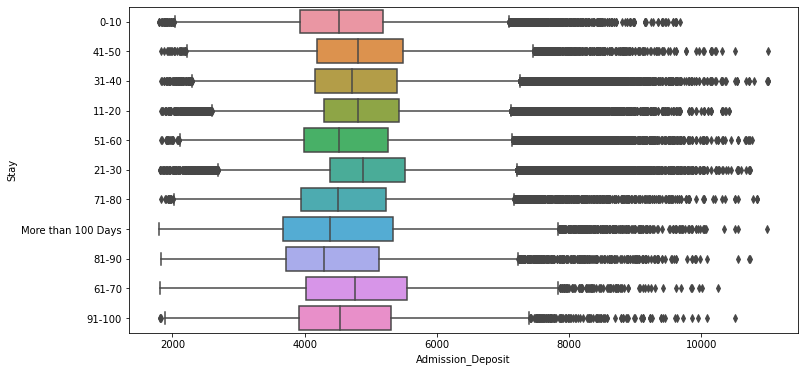

In [ ]:
# a,b=plt.subplots(2,2,figsize=(8,10))
sns.boxplot(train_main['Admission_Deposit'],train_main['Stay'])
# sns.boxplot(df['Hospital_type_code'],df['Stay'],ax=b[0,1])

In [ ]:
def bin_var(var1):
  if var1 >= 1800 and var1 <=3000:
    return '1800-3000'
  elif var1 > 3000 and var1 <= 4000:
    return '3000-4000'
  elif var1 > 4000 and var1 <= 5000:
    return '4000-5000'
  elif var1 > 5000 and var1 <= 7000:
    return '5000-7000'
  elif var1 > 7000 and var1 <= 9000:
    return '7000-9000'
  else:
    return '>9000'
train_main['Admission_Deposit1']  = train_main[['Admission_Deposit']].apply(lambda x: bin_var(x['Admission_Deposit']),axis=1)
test_main['Admission_Deposit1']  = test_main[['Admission_Deposit']].apply(lambda x: bin_var(x['Admission_Deposit']),axis=1)

In [ ]:
def bin_var(var1):
  if var1 >= 0 and var1 <= 2:
    return '0-2'
  elif var1 > 2 and var1 <= 3:
    return '2-3'
  elif var1 > 3 and var1 <= 4:
    return '3-4'
  elif var1 > 4 and var1 <= 5:
    return '4-5'
  elif var1 > 5 and var1 <= 6:
    return '5-6'
  else:
    return '>7'
train_main['Visitors_with_Patient']  = train_main[['Visitors with Patient']].apply(lambda x: bin_var(x['Visitors with Patient']),axis=1)
test_main['Visitors_with_Patient']  = test_main[['Visitors with Patient']].apply(lambda x: bin_var(x['Visitors with Patient']),axis=1)

In [ ]:
# train_main['Admission_Deposit1'] = pd.qcut(train_main['Admission_Deposit'],4)
train_main['Admission_Deposit1'].value_counts()
train_main['Visitors_with_Patient'].value_counts()

4000-5000    136878
5000-7000    108424
3000-4000     51877
7000-9000     13524
1800-3000      6581
>9000          1154
Name: Admission_Deposit1, dtype: int64

0-2    139646
3-4     79225
2-3     59180
5-6     18860
>7      12308
4-5      9219
Name: Visitors_with_Patient, dtype: int64

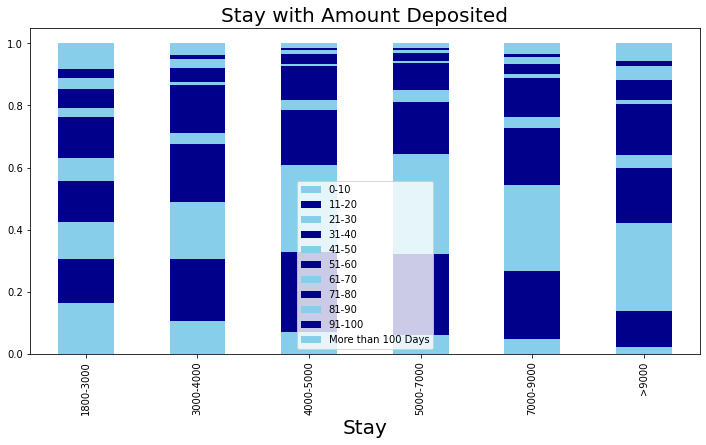

In [ ]:
data = pd.crosstab(train_main['Admission_Deposit1'],train_main['Stay'])
data.div(data.sum(1).astype('float'),axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 6), color = ['skyblue', 'darkblue'])
plt.title('Stay with Amount Deposited', fontsize = 20)
plt.xlabel('Stay', fontsize = 20)
plt.legend()
plt.show();

In [ ]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.base import TransformerMixin

In [ ]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_knn = KNNImputer()
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
train_main['Bed Grade'] = imputer_knn.fit_transform(train_main.loc[:,['Bed Grade']])
train_main['City_Code_Patient'] = imputer_knn.fit_transform(train_main[['City_Code_Patient']])

test_main['Bed Grade'] = imputer_knn.fit_transform(test_main.loc[:,['Bed Grade']])
test_main['City_Code_Patient'] = imputer_knn.fit_transform(test_main[['City_Code_Patient']])

In [ ]:
train_main = train_main.drop(columns= {'Visitors with Patient','Admission_Deposit'},axis=1)
test_main = test_main.drop(columns= {'Visitors with Patient','Admission_Deposit'},axis=1)

## Feature Engineering

In [ ]:
train_main.columns

In [ ]:
# Calculate per pateient average amount paid
# train_main['Avg_amt_depst'] = train_main[['patientid','Admission_Deposit']].groupby('patientid').agg({'Admission_Deposit':'sum'})
# train_main['dis_cnt'] = train_main[['patientid','case_id','Department']].groupby(['case_id','patientid']).agg({'Department':'nunique'})
# train_main['dis_cnt'] = train_main[['patientid','case_id','Admission_Deposit']].groupby(['case_id','patientid']).agg({'Admission_Deposit':'sum'})

### Label & One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
train_main.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Age', 'Stay', 'Admission_Deposit1',
       'Visitors_with_Patient'],
      dtype='object')

In [ ]:
train_main['Stay'] = train_main['Stay'].map({'0-10': 1, '11-20': 2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,
                                             '71-80':8,'81-90':9,'91-100':10,'More than 100 Days':11})

In [ ]:
train_main_Id = train_main[['case_id','patientid']]
test_main_Id = test_main[['case_id','patientid']]

train_main = train_main.drop(columns={'case_id','patientid'},axis = 1)
test_main = test_main.drop(columns={'case_id','patientid'},axis = 1)

In [ ]:
columns = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'City_Code_Patient', 'Type of Admission','Severity of Illness','Age']

In [ ]:
# def label_encode(data, var1):
#   # df1['enrolled_university']=le.fit_transform(df1['enrolled_university'])
#   for column in columns:
#     data[column] = le.fit_transform(data[column])
#     return

In [ ]:
# Train Data
train_main['Hospital_code']=le.fit_transform(train_main['Hospital_code'])
train_main['Hospital_type_code']=le.fit_transform(train_main['Hospital_type_code'])
train_main['City_Code_Hospital']=le.fit_transform(train_main['City_Code_Hospital'])
train_main['Hospital_region_code']=le.fit_transform(train_main['Hospital_region_code'])
train_main['Available Extra Rooms in Hospital']=le.fit_transform(train_main['Available Extra Rooms in Hospital'])
train_main['Department']=le.fit_transform(train_main['Department'])
train_main['Ward_Type']=le.fit_transform(train_main['Ward_Type'])
train_main['Ward_Facility_Code']=le.fit_transform(train_main['Ward_Facility_Code'])
train_main['Bed Grade']=le.fit_transform(train_main['Bed Grade'])
train_main['City_Code_Patient']=le.fit_transform(train_main['City_Code_Patient'])
train_main['Type of Admission']=le.fit_transform(train_main['Type of Admission'])
train_main['Severity of Illness']=le.fit_transform(train_main['Severity of Illness'])
train_main['Age']=le.fit_transform(train_main['Age'])
train_main['Admission_Deposit1']=le.fit_transform(train_main['Admission_Deposit1'])
train_main['Visitors_with_Patient']=le.fit_transform(train_main['Visitors_with_Patient'])

# Test Data
test_main['Hospital_code']=le.fit_transform(test_main['Hospital_code'])
test_main['Hospital_type_code']=le.fit_transform(test_main['Hospital_type_code'])
test_main['City_Code_Hospital']=le.fit_transform(test_main['City_Code_Hospital'])
test_main['Hospital_region_code']=le.fit_transform(test_main['Hospital_region_code'])
test_main['Available Extra Rooms in Hospital']=le.fit_transform(test_main['Available Extra Rooms in Hospital'])
test_main['Department']=le.fit_transform(test_main['Department'])
test_main['Ward_Type']=le.fit_transform(test_main['Ward_Type'])
test_main['Ward_Facility_Code']=le.fit_transform(test_main['Ward_Facility_Code'])
test_main['Bed Grade']=le.fit_transform(test_main['Bed Grade'])
test_main['City_Code_Patient']=le.fit_transform(test_main['City_Code_Patient'])
test_main['Type of Admission']=le.fit_transform(test_main['Type of Admission'])
test_main['Severity of Illness']=le.fit_transform(test_main['Severity of Illness'])
test_main['Age']=le.fit_transform(test_main['Age'])
test_main['Admission_Deposit1']=le.fit_transform(test_main['Admission_Deposit1'])
test_main['Visitors_with_Patient']=le.fit_transform(test_main['Visitors_with_Patient'])

In [ ]:
train_main.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age,Stay,Admission_Deposit1,Visitors_with_Patient
0,30,2,5,2,11,3,2,5,1,6,0,0,5,1,2,0
1,11,2,7,2,7,3,3,5,1,6,1,0,5,5,3,0


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score

In [ ]:
train_main['Stay'].value_counts(normalize=True)*100# Imbalanced dataset

3     27.475050
2     24.538215
4     17.321739
6     10.996803
1      7.412432
5      3.687688
8      3.220093
11     2.098682
9      1.519291
10     0.868301
7      0.861706
Name: Stay, dtype: float64

In [ ]:
X = train_main.drop('Stay',1)
y = train_main['Stay']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state =1)

In [ ]:
!pip install catboost

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
cat = CatBoostClassifier(custom_metric=['Accuracy'], learning_rate=0.03, n_estimators=200, verbose = False)

In [ ]:
cat.fit(X_train, y_train,eval_set=(X_valid, y_valid), verbose=10)   

0:	learn: 2.3603435	test: 2.3604988	best: 2.3604988 (0)	total: 715ms	remaining: 2m 22s
10:	learn: 2.1244647	test: 2.1257196	best: 2.1257196 (10)	total: 7s	remaining: 2m
20:	learn: 2.0042969	test: 2.0064542	best: 2.0064542 (20)	total: 13.5s	remaining: 1m 54s
30:	learn: 1.9335475	test: 1.9364765	best: 1.9364765 (30)	total: 21.9s	remaining: 1m 59s
40:	learn: 1.8897885	test: 1.8934275	best: 1.8934275 (40)	total: 28.3s	remaining: 1m 49s
50:	learn: 1.8611044	test: 1.8653814	best: 1.8653814 (50)	total: 34.7s	remaining: 1m 41s
60:	learn: 1.8421797	test: 1.8469901	best: 1.8469901 (60)	total: 40.8s	remaining: 1m 32s
70:	learn: 1.8291999	test: 1.8345008	best: 1.8345008 (70)	total: 47.2s	remaining: 1m 25s
80:	learn: 1.8199638	test: 1.8258275	best: 1.8258275 (80)	total: 53.7s	remaining: 1m 18s
90:	learn: 1.8131516	test: 1.8195091	best: 1.8195091 (90)	total: 1m	remaining: 1m 11s
100:	learn: 1.8076076	test: 1.8144550	best: 1.8144550 (100)	total: 1m 6s	remaining: 1m 5s
110:	learn: 1.8032686	test: 1.81

In [ ]:
# 4. Get the Best Score of 'auc'
print(cat.get_best_score())

{'learn': {'Accuracy': 0.33387634936211974, 'MultiClass': 1.7845984005779778}, 'validation': {'Accuracy': 0.32894736842105265, 'MultiClass': 1.7954571085825581}}


In [ ]:
test_main.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Age
0,13,2,5,2,8,2,3,0,1,1,0,2,7
1,21,0,6,0,6,2,3,5,1,1,1,2,7
2,18,1,4,1,8,2,1,3,4,1,0,2,7
3,28,0,8,0,8,2,1,5,1,1,1,2,7
4,20,1,2,0,6,2,2,5,1,1,1,2,7


In [ ]:
# 3. Predict the Probability Values of Target "Outcome" for "test" data :
cat_pred_valid = cat.predict(X_valid)
cat_pred_valid_prob = cat.predict_proba(X_valid)

# Test Data
cat_pred_test = cat.predict(test_main)
cat_pred__test_prob = cat.predict_proba(test_main)

In [ ]:
print(cat_pred_test[:4])
print(cat_pred_valid[:4])

[[6]
 [6]
 [3]
 [3]]
[[6]
 [3]
 [3]
 [2]]


In [ ]:
cat1 = CatBoostClassifier(custom_metric=['Accuracy'], learning_rate=0.15, random_seed=50, max_depth = 5,n_estimators=500, verbose = False)

In [ ]:
cat1.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=50)

0:	learn: 2.2262226	test: 2.2266312	best: 2.2266312 (0)	total: 514ms	remaining: 4m 16s
50:	learn: 1.7877459	test: 1.7961286	best: 1.7961286 (50)	total: 20.9s	remaining: 3m 3s
100:	learn: 1.7722589	test: 1.7858698	best: 1.7858698 (100)	total: 42.5s	remaining: 2m 48s
150:	learn: 1.7630168	test: 1.7808056	best: 1.7808056 (150)	total: 1m 2s	remaining: 2m 23s
200:	learn: 1.7563932	test: 1.7784054	best: 1.7784054 (200)	total: 1m 22s	remaining: 2m 2s
250:	learn: 1.7515350	test: 1.7772348	best: 1.7772348 (250)	total: 1m 41s	remaining: 1m 40s
300:	learn: 1.7470105	test: 1.7763786	best: 1.7763786 (300)	total: 2m	remaining: 1m 19s
350:	learn: 1.7429084	test: 1.7756567	best: 1.7756419 (344)	total: 2m 20s	remaining: 59.7s
400:	learn: 1.7390025	test: 1.7752303	best: 1.7752303 (400)	total: 2m 40s	remaining: 39.5s
450:	learn: 1.7353415	test: 1.7746168	best: 1.7746168 (450)	total: 2m 59s	remaining: 19.5s
499:	learn: 1.7321707	test: 1.7744667	best: 1.7744667 (499)	total: 3m 18s	remaining: 0us

bestTest 

In [ ]:
print(cat1.get_best_score())

{'learn': {'Accuracy': 0.3504494602551521, 'MultiClass': 1.7321707201676946}, 'validation': {'Accuracy': 0.33530649415902525, 'MultiClass': 1.7744666925252879}}


In [ ]:
#using precision score for error metrics
precision_score(cat_pred_valid,y_valid,average=None).mean()

0.12484754498301123

In [ ]:
import lightgbm as lgb

In [ ]:
#Converting the dataset in proper LGB format
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid, reference=train_main)
d_test = lgb.Dataset(test_main)

In [ ]:
#setting up the parameters
params={}
params['learning_rate']=0.4
params['num_leaves']=30
params['metric']='multi_logloss' #GradientBoostingDecisionTree
params['is_unbalance']='False' #GradientBoostingDecisionTree
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
# params['metric']='multi_logloss' #metric for multi-class
params['max_depth']= 10
params['num_class'] = 12 #no.of unique values in the target class not inclusive of the end value
params['feature_fraction'] = 0.9

In [ ]:
#training the model
lgb_1 = lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
lgb_pred_1 = lgb_1.predict(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error,roc_auc_score,precision_score

In [ ]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in lgb_pred_1]
#using precision score for error metrics
precision_score(y_pred_1,y_valid,average=None).mean()

0.23655825285496077

In [ ]:
#Accuracy
accuracy_score(y_pred_1,y_valid)

0.41543147845748024

In [ ]:
lgb_pred_test = lgb_1.predict(test_main)
#argmax() method 
y_pred_2 = [np.argmax(line) for line in lgb_pred_test]

In [ ]:
train_main['Stay'].value_counts()

3     87491
2     78139
4     55159
6     35018
1     23604
5     11743
8     10254
11     6683
9      4838
10     2765
7      2744
Name: Stay, dtype: int64

In [ ]:
y_pred_2[:12]

[1, 6, 3, 3, 6, 3, 3, 2, 3, 3, 3, 6]

In [ ]:
train_main_Id = train_main[['case_id','patientid']]
test_main_Id = test_main[['case_id','patientid']]

In [ ]:
test_main_Id.head(2)

,case_id,patientid
0,318439,17006
1,318440,17006


In [ ]:
col=['case_id','Stay']
submit_test = pd.concat([test_main_Id['case_id'],pd.DataFrame(y_pred_2)], axis=1)
submit_test.columns = col
# submit_test['Stay']=encoder.inverse_transform(submit_test['Stay'])
submit_test.head()

,case_id,Stay
0,318439,1
1,318440,6
2,318441,3
3,318442,3
4,318443,6


In [ ]:
submit_test['Stay'].value_counts()

3     52979
2     41570
6     19789
4     12400
1      4717
11     2615
9      1547
10      510
8       455
7       265
5       210
Name: Stay, dtype: int64

In [ ]:
submit_test['Stay'] = submit_test['Stay'].map({ 1.0:'0-10', 2.0:'11-20',3.0:'21-30',4.0:'31-40',
                                               5.0:'41-50',6.0:'51-60',7.0:'61-70',8.0:'71-80',
                                               9.0:'81-90',10.0:'91-100',11.0:'More than 100 Days'})

In [ ]:
submit_test['Stay'].value_counts()

21-30                 52979
11-20                 41570
51-60                 19789
31-40                 12400
0-10                   4717
More than 100 Days     2615
81-90                  1547
91-100                  510
71-80                   455
61-70                   265
41-50                   210
Name: Stay, dtype: int64

In [ ]:
submit_test.to_excel(project_path+'sample_submission.xlsx', index=False)

## Save the Model

In [ ]:
# Save the model
lgb_1.save_model(project_path+'mode.txt')
#load from model:
# bst = lgb.Booster(model_file='mode.txt')

In [ ]:
import joblib
# save model
joblib.dump(lgb_1, project_path+'lgb.pkl')
# load model
# gbm_pickle = joblib.load('lgb.pkl')

['/content/drive/My Drive/Healthcare_Analytics_Jantahack_AV/lgb.pkl']

## Hyperopt Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
import hyperopt
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

## Grid Search CV

In [ ]:
params = {
    'task': 'train',
    'num_class': 12,
    'boosting_type': 'gbdt',
    'objective': 'multiclass', #binary for binary class
    'metric': 'multi_logloss', # log_loss for binary
    'metric_freq': 1,
    'is_training_metric': True,
    'max_bin': 255,
    'learning_rate': 0.4,
    'num_leaves': 63,
    'tree_learner': 'serial',
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf': 50,
    'min_sum_hessian_in_leaf': 5,
    'is_enable_sparse': True,
    'use_two_round_loading': False,
    'is_save_binary_file': False,
    'output_model': 'LightGBM_model.txt',
    'num_machines': 1,
    'local_listen_port': 12400,
    'machine_list_file': 'mlist.txt',
    'verbose': 0,
    # parameters to keep the exactly the same
    'subsample_for_bin': 200000,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0
}

In [ ]:
# train

lgbm = lgb.train(params,d_train)

gridParams = {
    'learning_rate': np.array([0.3,0.4,0.5]),
    'max_depth': np.array([10,20,30]),
    'num_leaves': np.array([20,31,40]),
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],

}

mdl = lgb.LGBMClassifier(
    task = params['task'],
    metric = params['metric'],
    metric_freq = params['metric_freq'],
    is_training_metric = params['is_training_metric'],
    max_bin = params['max_bin'],
    tree_learner = params['tree_learner'],
    feature_fraction = params['feature_fraction'],
    bagging_fraction = params['bagging_fraction'],
    bagging_freq = params['bagging_freq'],
    min_data_in_leaf = params['min_data_in_leaf'],
    min_sum_hessian_in_leaf = params['min_sum_hessian_in_leaf'],
    is_enable_sparse = params['is_enable_sparse'],
    use_two_round_loading = params['use_two_round_loading'],
    is_save_binary_file = params['is_save_binary_file'],
    n_jobs = -1
)
# Create the grid
scoring = {'accuracy': 'accuracy'}
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='accuracy')

In [ ]:
# Run the grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 58.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=5,
                                      boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      feature_fraction=0.8,
                                      importance_type='split',
                                      is_enable_sparse=True,
                                      is_save_binary_file=False,
                                      is_training_metric=True,
                                      learning_rate=0.1, max_bin=255,
                                      max_depth=-1, metric='multi_logloss',
                                      metric_freq=...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000, ...),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': [

In [ ]:
print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

Best parameters found by grid search are: {'boosting_type': 'gbdt', 'learning_rate': 0.3, 'max_depth': 20, 'num_leaves': 31, 'objective': 'multiclass'}
Best score found by grid search is: 0.4220529931305201


In [ ]:
grid_pred_val = grid.predict(X_valid)
#argmax() method 
y_pred_val = [np.argmax(line) for line in grid_pred_val]

In [ ]:
#Accuracy
accuracy_score(grid_pred_val,y_valid)

0.42037746514257

In [ ]:
# d_test = lgb.Dataset(test_main)
grid_pred_test = grid.predict(test_main)
#argmax() method 
y_pred_val = [np.argmax(line) for line in grid_pred_test]

In [ ]:
grid_pred_test[:4]

array([1, 6, 3, 3])

In [ ]:
col=['case_id','Stay']
submit_test = pd.concat([test_main_Id['case_id'],pd.DataFrame(grid_pred_test)], axis=1)
submit_test.columns = col
# submit_test['Stay']=encoder.inverse_transform(submit_test['Stay'])
submit_test.head()

,case_id,Stay
0,318439,1
1,318440,6
2,318441,3
3,318442,3
4,318443,6


In [ ]:
submit_test['Stay'] = submit_test['Stay'].map({ 1.0:'0-10', 2.0:'11-20',3.0:'21-30',4.0:'31-40',
                                               5.0:'41-50',6.0:'51-60',7.0:'61-70',8.0:'71-80',
                                               9.0:'81-90',10.0:'91-100',11.0:'More than 100 Days'})

In [ ]:
submit_test.to_excel(project_path+'sample_submission_grid_lgbm.xlsx', index=False)

### Save the model

In [ ]:
# import joblib
# # save model
# joblib.dump(lgb_1, project_path+'lgb.pkl')
# # load model
# # gbm_pickle = joblib.load('lgb.pkl')

['/content/drive/My Drive/Healthcare_Analytics_Jantahack_AV/lgb.pkl']

In [ ]:
from sklearn.externals import joblib
joblib.dump(grid.best_estimator_, project_path+'grid.pkl')

['/content/drive/My Drive/Healthcare_Analytics_Jantahack_AV/grid.pkl']

## Save the raw data

In [ ]:
X_train.to_csv(project_path+'X_train.csv', index=False)
y_train.to_csv(project_path+'y_train.csv', index=False)
X_valid.to_csv(project_path+'X_valid.csv', index=False)
y_valid.to_csv(project_path+'y_valid.csv', index=False)
test_main.to_csv(project_path+'test_main.csv', index=False)

In [ ]:
# Load the data back
X_train = pd.read_csv(project_path+'X_train.csv')
y_train = pd.read_csv(project_path+'y_train.csv')
X_valid = pd.read_csv(project_path+'X_valid.csv')
y_valid = pd.read_csv(project_path+'y_valid.csv')
test_main = pd.read_csv(project_path+'test_main.csv')

In [ ]:
X_train.shape
X_valid.shape
test_main.shape

(254750, 15)

(63688, 15)

(137057, 15)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# smote = SMOTE('minority')

# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')
# # fit and apply the transform
# X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
# print(X_train_under.shape,y_train_under.shape)

In [ ]:
# X_train_sm,y_train_sm = smote.fit_sample(X_train,y_train)
# print(X_train_sm.shape,y_train_sm.shape)

In [ ]:
#Converting the dataset in proper LGB format
d_train = lgb.Dataset(X_train, label=y_train)
# d_train_us = lgb.Dataset(X_train_under, label=y_train_under)
# d_valid = lgb.Dataset(X_valid, label=y_valid, reference=train_main)
# d_test = lgb.Dataset(test_main)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score

In [ ]:
#setting up the parameters
params={}
params['learning_rate']=0.28
params['num_leaves']=31
params['metric']='multi_logloss' #GradientBoostingDecisionTree
params['is_unbalance']='False' #GradientBoostingDecisionTree
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
# params['metric']='multi_logloss' #metric for multi-class
params['max_depth']= 30
params['num_class'] = 12 #no.of unique values in the target class not inclusive of the end value
params['feature_fraction'] = 0.9

In [ ]:
#training the model
lgb_2 = lgb.train(params,d_train,100)  #training the model on 100 epocs
#prediction on the test dataset
lgb_pred_2 = lgb_2.predict(X_valid)

In [ ]:
#argmax() method 
y_pred_2 = [np.argmax(line) for line in lgb_pred_2]
#using precision score for error metrics
precision_score(y_pred_2,y_valid,average=None).mean()

0.23844552719097906

In [ ]:
#Accuracy
accuracy_score(y_pred_2,y_valid)

0.41816354729305366

In [ ]:
lgb_pred_test = lgb_1.predict(test_main)
#argmax() method 
y_pred_2 = [np.argmax(line) for line in lgb_pred_test]

In [ ]:
# train_main_Id = train_main[['case_id','patientid']]
# test_main_Id = test_main[['case_id','patientid']]

In [ ]:
test_main_Id.head(2)

,case_id,patientid
0,318439,17006
1,318440,17006


In [ ]:
col=['case_id','Stay']
submit_test = pd.concat([test_main_Id['case_id'],pd.DataFrame(y_pred_2)], axis=1)
submit_test.columns = col
# submit_test['Stay']=encoder.inverse_transform(submit_test['Stay'])
submit_test.head()

,case_id,Stay
0,318439,1
1,318440,6
2,318441,3
3,318442,3
4,318443,6


In [ ]:
submit_test['Stay'].value_counts()

3     52979
2     41570
6     19789
4     12400
1      4717
11     2615
9      1547
10      510
8       455
7       265
5       210
Name: Stay, dtype: int64

In [ ]:
submit_test['Stay'] = submit_test['Stay'].map({ 1.0:'0-10', 2.0:'11-20',3.0:'21-30',4.0:'31-40',
                                               5.0:'41-50',6.0:'51-60',7.0:'61-70',8.0:'71-80',
                                               9.0:'81-90',10.0:'91-100',11.0:'More than 100 Days'})

In [ ]:
submit_test['Stay'].value_counts()

21-30                 52979
11-20                 41570
51-60                 19789
31-40                 12400
0-10                   4717
More than 100 Days     2615
81-90                  1547
91-100                  510
71-80                   455
61-70                   265
41-50                   210
Name: Stay, dtype: int64

In [ ]:
submit_test.to_excel(project_path+'sample_submission.xlsx', index=False)

## Save the Model